# Introdução

Este caderno visa aplicar métricas nas imagens da tabela periódica com vários contrastes.

In [1]:
import glob
import cv2
import numpy as np
import pickle
import time

from funcoes import *

In [2]:
arquivos_na_pasta =  glob.glob('Imagens\*.jpg') # modificar caso necessário
arquivos_na_pasta.sort()
listaImagens = []
for file in arquivos_na_pasta:
    print(file)
    listaImagens.append(file)

Imagens\recorte_leite_00.jpg
Imagens\recorte_leite_05.jpg
Imagens\recorte_leite_10.jpg
Imagens\recorte_leite_15.jpg
Imagens\recorte_leite_20.jpg
Imagens\recorte_leite_25.jpg
Imagens\recorte_leite_30.jpg
Imagens\recorte_leite_35.jpg
Imagens\recorte_leite_99.jpg


In [3]:
# lista_pickle = [listaImagens, testImg, df, df2, df3]
# Saving the objects:
# with open('objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump(lista_pickle, f)

# Getting back the objects:
with open('objs.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    listaImagens,testImg, df, df2, df3 = pickle.load(f)
with open('df_copia.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    df_copia = pickle.load(f)

# Definindo as métricas

## Leite

x, std = media_quadrados(r, iteracoes, tamanho)

## HS

## Michelson
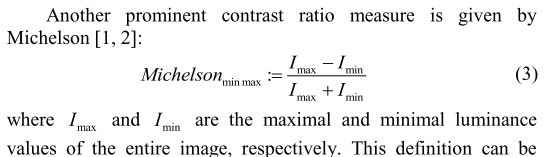

## RMS - Root Mean Square contrast
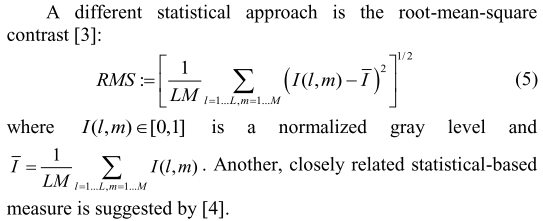

### Análise de algumas diferentes formas de se ler uma figura

# Aplicando métricas

In [4]:
metricas = [HS,michelson, RMS]
lista_HS = []
lista_michelson = []
lista_RMS = []
for file in arquivos_na_pasta:
    lista_HS.append(HS(file))

Michelson

In [5]:
for file in arquivos_na_pasta:
    lista_michelson.append(michelson(file))

C:\Users\gccar\Documents\GitHub\Paper-nova-metrica\funcoes.py:57: RuntimeWarning: overflow encountered in ubyte_scalars
  denominador = np.max(imagem) + np.min(imagem)


RMS

In [6]:
for file in arquivos_na_pasta:
    lista_RMS.append(RMS(file))

Leite

In [7]:
medias = []
desvios = []
tamanho = 1
iteracoes = 20000
for file in arquivos_na_pasta:
    imagem = cv2.imread(file,0)
    x, std = media_quadrados(imagem, iteracoes, tamanho)
    medias.append(x)
    desvios.append(std)

# Criando DataFrame

In [8]:
import pandas as pd

# dataframe em preto e branco
concentracao = [0,5,10,15,20,25,30,35,99]
df = pd.DataFrame(
{
    "Concentracao":concentracao,
    "Leite":medias,
    "HS":lista_HS,
    "RMS":lista_RMS,
    "Michelson":lista_michelson,
})

In [9]:
df

,Concentracao,Leite,HS,RMS,Michelson
0,0,252.52650,0.231373,0.227095,1.000000
1,5,250.47375,0.212121,0.082456,2.444444
2,10,246.36825,0.202899,0.042151,0.851852
3,15,241.81650,0.181818,0.024688,0.440000
4,20,235.03350,0.166667,0.015062,0.272727
5,25,232.40700,0.142857,0.014121,0.233333
6,30,229.43625,0.172414,0.013638,0.235772
7,35,228.41625,0.176471,0.015040,0.274194
8,99,243.80550,0.188679,0.026970,0.381295


In [10]:
import seaborn as sns
sns.set()

In [16]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

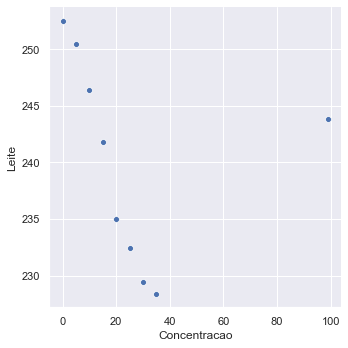

<Figure size 432x288 with 0 Axes>

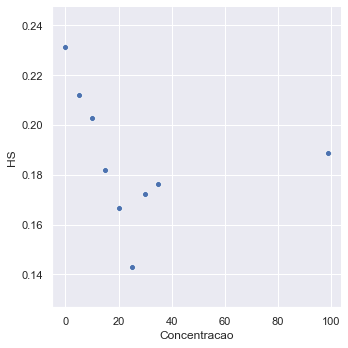

<Figure size 432x288 with 0 Axes>

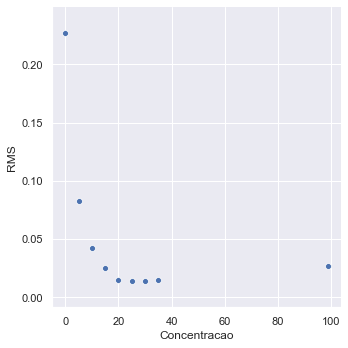

<Figure size 432x288 with 0 Axes>

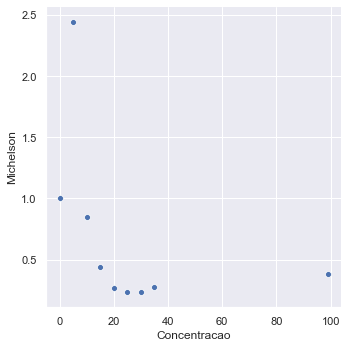

In [17]:
for coluna in df.columns[1:]:
    plt.figure()
    sns.relplot(x="Concentracao", y=coluna, data=df);

## Tarefa, aplicar HS em vários tamanhos diferentes e descobrir qual a diferença entre os valores

In [18]:
tamanhos = [5,10,50,100,200,500,1000]
iteracoes = [1,10,100,1000]
# tamanhos = [1,5,10]
# iteracoes = [1,10]

In [19]:
import time
temp = []
primeira_imagem = cv2.imread(arquivos_na_pasta[0],0)
for tamanho in tamanhos:
    for N in iteracoes:
        tic = time.time()
        valor, std = quadrados_media_std(primeira_imagem,N,tamanho,HS)
        temp.append([tamanho,N,valor,std])
        toc = time.time()
        print(tamanho,N,"\nTempo de execução: ",toc-tic)
print(temp)

5 1 
Tempo de execução:  0.006980180740356445
5 10 
Tempo de execução:  0.013962507247924805
5 100 
Tempo de execução:  0.1326451301574707
5 1000 
Tempo de execução:  1.0274224281311035
10 1 
Tempo de execução:  0.0019986629486083984
10 10 
Tempo de execução:  0.011965274810791016
10 100 
Tempo de execução:  0.07380008697509766
10 1000 
Tempo de execução:  0.7861232757568359
50 1 
Tempo de execução:  0.0010356903076171875
50 10 
Tempo de execução:  0.006942272186279297
50 100 
Tempo de execução:  0.07619142532348633
50 1000 
Tempo de execução:  0.880211591720581
100 1 
Tempo de execução:  0.000997781753540039
100 10 
Tempo de execução:  0.01595783233642578
100 100 
Tempo de execução:  0.09525823593139648
100 1000 
Tempo de execução:  1.113311529159546
200 1 
Tempo de execução:  0.002992868423461914
200 10 
Tempo de execução:  0.015950441360473633
200 100 
Tempo de execução:  0.2184278964996338
200 1000 
Tempo de execução:  1.6896450519561768
500 1 
Tempo de execução:  0.007978439331054

In [20]:
df2 = pd.DataFrame(data=temp,columns=['Tamanho',"Iteracoes", "Valor", "Std"])
df2

,Tamanho,Iteracoes,Valor,Std
0,5,1,0.368421,0.000000
1,5,10,4.844476,13.718870
2,5,100,4.434665,28.438397
3,5,1000,2.834465,20.232991
4,10,1,0.068493,0.000000
5,10,10,0.317729,0.129581
6,10,100,0.289867,0.152251
7,10,1000,0.278348,0.141121
8,50,1,0.562753,0.000000
9,50,10,0.256193,0.196909


In [21]:
HS(primeira_imagem)

0.23137254901960785

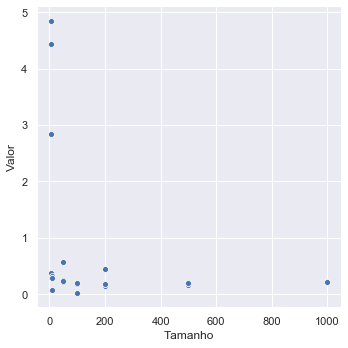

In [22]:
sns.relplot(x="Tamanho", y="Valor", data=df2,palette='inferno');

Text(0.5, 1, 'HS com vários tamanhos de quadrados e de iterações')

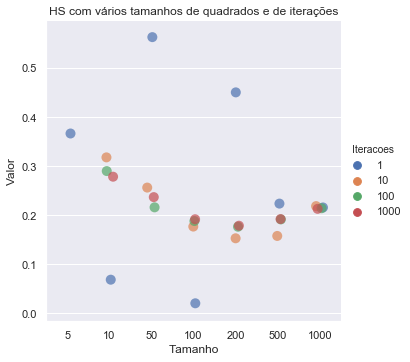

In [23]:
sns.catplot(x="Tamanho", y="Valor",hue='Iteracoes' ,data=df2.loc[df2.Valor < 1],
            s=10,
            alpha=0.7);
plt.title('HS com vários tamanhos de quadrados e de iterações')


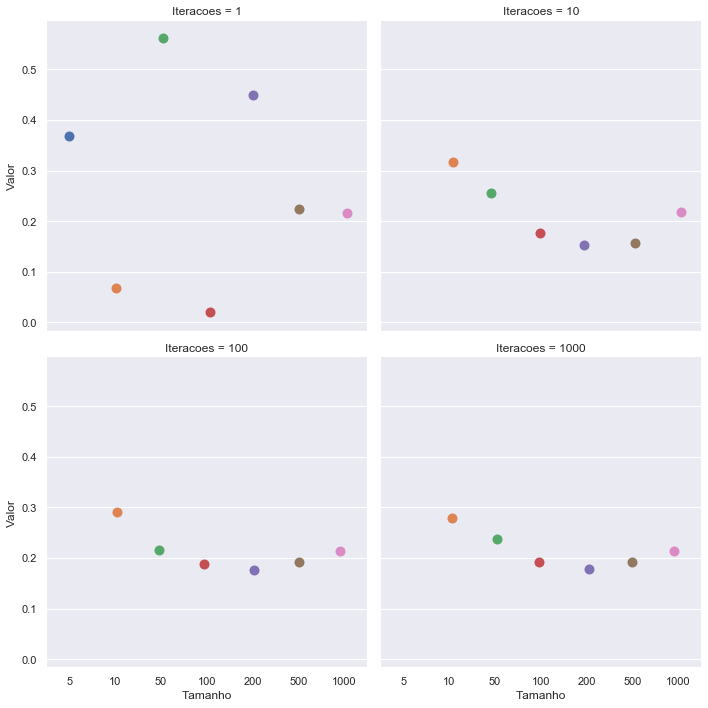

In [24]:
sns.catplot(x="Tamanho", y="Valor",col='Iteracoes' ,data=df2.loc[df2.Valor < 1],
           col_wrap=2,
           s=10)

In [25]:
# import time
# temp = []
# primeira_imagem = cv2.imread(arquivos_na_pasta[0],0)
# for tamanho in tamanhos:
#     for N in [10000,50000]:
#         tic = time.time()
#         valor, std = quadrados_media_std(primeira_imagem,N,tamanho,HS)
#         temp.append([tamanho,N,valor,std])
#         toc = time.time()
#         print(tamanho,N,"\nTempo de execução: ",toc-tic)
# print(temp)

5 10000 
Tempo de execução:  9.46733570098877
5 50000 
Tempo de execução:  52.89278292655945
10 10000 
Tempo de execução:  8.828792333602905
10 50000 
Tempo de execução:  51.84617519378662
50 10000 
Tempo de execução:  12.96889877319336
50 50000 
Tempo de execução:  64.28495693206787
100 10000 
Tempo de execução:  12.863162994384766
100 50000 
Tempo de execução:  68.4684739112854
200 10000 
Tempo de execução:  22.835113286972046
200 50000 
Tempo de execução:  113.80686783790588
500 10000 
Tempo de execução:  105.0527880191803


KeyboardInterrupt: 

In [ ]:
df3 = pd.DataFrame(data=temp,columns=['Tamanho',"Iteracoes", "Valor", "Std"])
df3

In [ ]:
sns.catplot(x="Tamanho", y="Valor",hue='Iteracoes' ,data=df3.loc[df3.Valor < 1],
            s=10,
            alpha=0.7);

plt.title('HS com vários tamanhos de quadrados e de iterações')


In [ ]:
df

# Cálculo dos desvios padrão / erros padrão para as métricas

Passos:
* Rodar novamente as métricas, utilizando um valor de N = 10.000 iterações.
* Salvar dados no dataframe.
* Calcular os erros padrão, coloque também no dataframe.
* Plotar os gráficos com os erros padrão. 
* Salvar df no pickle, excel.
* Limpar código, salvar em py

In [ ]:
df_copia = df.copy()

In [ ]:
# 1. Rodar novamente as métricas, utilizando um valor de N = 10.000 iterações.
import time
tamanho = 100
iteracoes = 1000
N = iteracoes
temp = []

primeira_imagem = cv2.imread(arquivos_na_pasta[0],0)


for metrica in [weber]:
    valor_lista = []
    std_lista=[]
    
    for file in arquivos_na_pasta:
        tic = time.time()
        imagem = cv2.imread(file,0) 
        valor, std  = quadrados_media_std(imagem,N,tamanho,metrica)
        toc = time.time()
        print("\nTempo de execução: ",toc-tic)
        print("metrica: ", metrica.__name__)
        print("imagem: ", file)
        valor_lista.append(valor)
        std_lista.append(std)
        


    # 2. Salvar dados no dataframe.
    df[metrica.__name__ + '_valor'] = valor_lista
    df[metrica.__name__ + '_std']   = std_lista

    # 3. Calcular os erros padrão, coloque também no dataframe.
    df[metrica.__name__ + '_erro']  = df[metrica.__name__ + '_std']/100 #std / sqrt(10.000

In [ ]:
df_temp[HS.__name__ + '_valor'] = 10

In [ ]:
str()

A partir de https://en.wikipedia.org/wiki/Contrast_(vision)#Weber_contrast, colocar também o contraste de Weber, definido como:

$$\frac{I-I_b}{I_b},$$

onde:

$I$ representa a luminancia dos atributos e $I_b$ representa a luminância do background.
> Weber contrast is commonly used in cases where small features are present on a large uniform background, i.e., where the average luminance is approximately equal to the background luminance.

De acordo com https://www.schorsch.com/en/kbase/glossary/contrast.html:
> Mathematically, the difference between the two luminances divided by the lower luminance . This definition is also called Weber Contrast, and is the most commonly useful one in the context of lighting.

$$C = (L_{max} - L_{min}) / L_{min}.$$

Na pergunta do Stack Overflow, https://stackoverflow.com/questions/5840665/how-to-implement-weber-contrast-of-an-image-in-matlab-octave, um usuário cria uma função específica (pra pergunta) para calcular o contraste Weber, mas creio que considera que temos uma imagem já separada em back e foreground.




Eu defini como sendo Foreground e Background, como na Monotonic Haziness e peguei o máximo e o mínimo deles, isto é:

$$(Fore_{max} - Back_{min})/ Back_{min}.$$


In [ ]:
def weber(imagem,tamanho):
    if type(imagem) == str:
        imagem = cv2.imread(imagem,0) 
        
    Back = recortar_quadrado(imagem, tamanho)
    Fore = recortar_quadrado(imagem, tamanho)
    maximo = np.max(Fore)
    minimo = np.min(Back)
    if minimo ==0:
        minimo = 1
#     print(maximo,minimo,abs(maximo-minimo)/minimo)
    return abs(maximo-minimo)/minimo

In [ ]:
tamanho = 1000
iteracoes = 10000
N = iteracoes
temp = []
valor=[]
valor_lista = []
std_lista=[]

for file in arquivos_na_pasta:
    tic = time.time()
    imagem = cv2.imread(file,0) 
    for _ in range(N):
        valor.append(weber(imagem,tamanho))
    media = np.mean(valor)
    std = np.std(valor)
    toc = time.time()
    print("\nTempo de execução: ",toc-tic)
    print(f'media {media} e desvio padrão {std}')
    print("imagem: ", file)
    valor_lista.append(media)
    std_lista.append(std)
    
df_copia['weber_valor'] = valor_lista
df_copia['weber_std'] = std_lista
df_copia['weber_erro'] = df_copia['weber_std']/100